In [2]:
import gzip
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
def readGz(path):
  for l in gzip.open(path, 'rt'):
    yield eval(l)

def readCSV(path):
  f = gzip.open(path, 'rt')
  f.readline()
  for l in f:
    yield l.strip().split(',')

In [4]:
# Read datasets
f = gzip.open("data/review-Hawaii.json.gz")
reviews = []
for l in f:
    reviews.append(json.loads(l))

f = gzip.open("data/meta-Hawaii.json.gz")
metas = []
for l in f:
    metas.append(json.loads(l))

reviews_df = pd.DataFrame(reviews)
metas_df = pd.DataFrame(metas)

## Task 1 - Data Exploration

In [5]:
reviews_df

,user_id,name,time,rating,text,pics,resp,gmap_id
0,114563412185193956773,M J,1625986477698,2.0,We got two size small dogs. Both had wayyyy to...,None,None,0x7c00456eecad3111:0x8217f9600c51f33
1,106014068654963315795,DJ,1623740696466,1.0,The asian guy working there took forever. Almo...,None,None,0x7c00456eecad3111:0x8217f9600c51f33
2,106135943668689718830,Gabriela Porras,1529699397115,5.0,I have never been a huge fan of hot dogs but t...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x7c00456eecad3111:0x8217f9600c51f33
3,100824151868133017941,Israel Jones,1582583419814,5.0,"Quality hot dog, delicious toppings!\n\nThe Co...",[{'url': ['https://lh5.googleusercontent.com/p...,None,0x7c00456eecad3111:0x8217f9600c51f33
4,109900744991405705942,Alex Y. Moreno,1527050588314,5.0,I got the Common Kings Dog. It was so much foo...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x7c00456eecad3111:0x8217f9600c51f33
...,...,...,...,...,...,...,...,...
3111526,116549919119718875136,Lauren Henninger,1578120354635,5.0,None,None,None,0x7953b4a4114e37f7:0x374b5a1f84f48a1a
3111527,107171708392189235547,Alex Belisario,1539011147499,5.0,None,None,None,0x7953b4a4114e37f7:0x374b5a1f84f48a1a
3111528,110423407378515539504,Andrew Davis,1565152300401,5.0,None,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x7953b4a4114e37f7:0x374b5a1f84f48a1a
3111529,101175320492449773149,Marshall,1552474937379,4.0,None,None,None,0x7953b4a4114e37f7:0x374b5a1f84f48a1a


In [6]:
metas_df

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,None,21.637796,-157.920714,[Restaurant],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
1,SMP - Single Marine Program,"SMP - Single Marine Program, G St, Kailua, HI ...",0x7c00159b5b1b1d25:0x8d2d85d4a758290e,None,21.440345,-157.754347,[Recreation center],4.1,18,None,"[[Thursday, 8AM–9PM], [Friday, 8AM–9PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Opens soon ⋅ 8AM,"[0x7c00155df23846af:0xfbe051d208292028, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
2,2 Cheesy Guys,"2 Cheesy Guys, 1486 HI-30, Wailuku, HI 96793",0x7954d376a8b12db3:0xa51dd57e1cc14ca9,None,20.853014,-156.503671,[Food court],5.0,6,None,"[[Thursday, Closed], [Friday, 11AM–6PM], [Satu...","{'Service options': ['Curbside pickup', 'Takeo...",Closed ⋅ Opens 11AM Fri,None,https://www.google.com/maps/place//data=!4m2!3...
3,Kraken Coffee Kahului,"Kraken Coffee Kahului, 520 Keolani Pl, Kahului...",0x7954d370921ff6bd:0x3193ba783e26d032,None,20.888238,-156.450614,[Coffee shop],4.8,8,$,"[[Thursday, 6:30AM–7PM], [Friday, 6:30AM–7PM],...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 7PM,None,https://www.google.com/maps/place//data=!4m2!3...
4,Akasatana Ramen Kyoto,"Akasatana Ramen Kyoto, 1450 Ala Moana Blvd, Ho...",0x7c006df045b01715:0xe945c308688e1a46,None,21.290463,-157.843730,[Ramen restaurant],5.0,1,None,"[[Thursday, 11AM–8:30PM], [Friday, 11AM–8:30PM...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 11AM,"[0x7c006df018f6177d:0x9beb6db40fadcb2, 0x7c006...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21502,McDonald's,"McDonald's, 65-1154 Mamalahoa Hwy, Waimea, HI ...",0x7953832d482da511:0x7ee6a739b2f11be5,"Classic, long-running fast-food chain known fo...",20.022391,-155.666890,"[Fast food restaurant, Breakfast restaurant, C...",3.7,338,$,"[[Wednesday, 6AM–9PM], [Thursday, 6AM–9PM], [F...","{'Service options': ['Curbside pickup', 'Drive...",NaN,"[0x79538332de5885b5:0x58215018756b4701, 0x7953...",https://www.google.com/maps/place//data=!4m2!3...
21503,Best Buy,"Best Buy, 98-051 Kamehameha Hwy, Aiea, HI 96701",0x7c006f55052ca5ab:0x5aab477977480cf6,Chain retailer with a large array of brand-nam...,21.384522,-157.949660,"[Electronics store, Appliance store, Computer ...",4.1,2388,$$,"[[Wednesday, 10AM–8PM], [Thursday, 10AM–8PM], ...","{'Service options': ['Curbside pickup', 'In-st...",NaN,"[0x7c00660d84ab0d0b:0xb5564c6a195a009e, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
21504,Pineapples Restaurant,"Pineapples Restaurant, 332 Keawe St, Hilo, HI ...",0x79524b579dee4ba5:0xcb4105c1d798a584,Happening restaurant featuring New American di...,19.722764,-155.086124,"[New American restaurant, American restaurant,...",4.5,2400,$$,"[[Wednesday, 11AM–9PM], [Thursday, 11AM–9PM], ...","{'Service options': ['Outdoor seating', 'Curbs...",NaN,"[0x79524ca9dc8eb6a1:0xa8efd269d2d342da, 0x7952...",https://www.google.com/maps/place//data=!4m2!3...
21505,Avis Car Rental,"Avis Car Rental, 300 Rodgers Boulevard Honolul...",0x7c006fa13aafa855:0x870a7de67429349c,None,21.333230,-157.916200,[Car rental agency],3.5,585,None,"[[Wednesday, 4AM–11PM], [Thursday, 4AM–11PM], ...","{'Highlights': ['Active military discounts'], ...",NaN,"[0x7c006fa7bcf9d287:0x3ed60b5d717e7d7c, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...


In [7]:
reviews_df.shape

(3111531, 8)

In [8]:
metas_df.shape

(21507, 15)

In [9]:
reviews_df.isnull().any()

user_id     True
name       False
time       False
rating      True
text        True
pics        True
resp        True
gmap_id    False
dtype: bool

In [10]:
# Check for duplicated gmap_ids in the meta data
duplicates = metas_df[metas_df['gmap_id'].duplicated(keep=False)]

In [11]:
duplicates

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",0x7c00456eecad3111:0x8217f9600c51f33,None,21.637796,-157.920714,[Restaurant],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
1,SMP - Single Marine Program,"SMP - Single Marine Program, G St, Kailua, HI ...",0x7c00159b5b1b1d25:0x8d2d85d4a758290e,None,21.440345,-157.754347,[Recreation center],4.1,18,None,"[[Thursday, 8AM–9PM], [Friday, 8AM–9PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Opens soon ⋅ 8AM,"[0x7c00155df23846af:0xfbe051d208292028, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
2,2 Cheesy Guys,"2 Cheesy Guys, 1486 HI-30, Wailuku, HI 96793",0x7954d376a8b12db3:0xa51dd57e1cc14ca9,None,20.853014,-156.503671,[Food court],5.0,6,None,"[[Thursday, Closed], [Friday, 11AM–6PM], [Satu...","{'Service options': ['Curbside pickup', 'Takeo...",Closed ⋅ Opens 11AM Fri,None,https://www.google.com/maps/place//data=!4m2!3...
3,Kraken Coffee Kahului,"Kraken Coffee Kahului, 520 Keolani Pl, Kahului...",0x7954d370921ff6bd:0x3193ba783e26d032,None,20.888238,-156.450614,[Coffee shop],4.8,8,$,"[[Thursday, 6:30AM–7PM], [Friday, 6:30AM–7PM],...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 7PM,None,https://www.google.com/maps/place//data=!4m2!3...
4,Akasatana Ramen Kyoto,"Akasatana Ramen Kyoto, 1450 Ala Moana Blvd, Ho...",0x7c006df045b01715:0xe945c308688e1a46,None,21.290463,-157.843730,[Ramen restaurant],5.0,1,None,"[[Thursday, 11AM–8:30PM], [Friday, 11AM–8:30PM...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 11AM,"[0x7c006df018f6177d:0x9beb6db40fadcb2, 0x7c006...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Cheung Chau Kunkee Store Inc,"Cheung Chau Kunkee Store Inc, 100 N Beretania ...",0x7c006e76ef03a53f:0xe2f9f8bf77e4ffe,None,21.314275,-157.861674,[Grocery store],5.0,1,None,"[[Tuesday, 8AM–8PM], [Wednesday, 8AM–8PM], [Th...","{'Service options': ['In-store shopping'], 'Pl...",Open ⋅ Closes 8PM,"[0x7c006e73fe5b1e15:0xf1bd34722fd0b994, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
168,Outer Island Stone Care,"Outer Island Stone Care, 345 W Kuiaha Rd #45, ...",0x7eab3456bdaa246b:0x8792f189e5260db8,None,20.917903,-156.307968,[Tile contractor],5.0,2,None,"[[Tuesday, 8AM–5PM], [Wednesday, 8AM–5PM], [Th...",None,Closes soon ⋅ 5PM ⋅ Opens 8AM Wed,"[0x7954d36c26dc3a23:0x300bae95d5421829, 0x7954...",https://www.google.com/maps/place//data=!4m2!3...
169,Island Comfort,"Island Comfort, 4337 Rice St, Lihue, HI 96766",0x7c071ea383427073:0xd7ea7b4be9c74f3b,None,21.973055,-159.366557,"[HVAC contractor, Air conditioning repair serv...",4.6,17,None,"[[Tuesday, 7AM–7PM], [Wednesday, 7AM–7PM], [Th...",{'Offerings': ['Repair services']},Open ⋅ Closes 7PM,"[0x7c071eeb7c457fcb:0x7d6affa9007cf092, 0x7c06...",https://www.google.com/maps/place//data=!4m2!3...
170,Aloha Plus Storage & Packaging,"Aloha Plus Storage & Packaging, 73-4840 Kanala...",0x79540dde43528db9:0x47f7bd82101ec4ee,None,19.686255,-156.020595,"[Self-storage facility, Mailing service, Movin...",4.5,8,None,"[[Tuesday, 8AM–5PM], [Wednesday, 8AM–5PM], [Th...",None,Permanently closed,"[0x79540ddc1ec2d9f3:0xc8f5ffb07fd8793e, 0x7954...",https://www.google.com/maps/place//data=!4m2!3...


### Examples of duplicated rows

In [12]:
duplicates = metas_df[metas_df['gmap_id'].duplicated(keep=False)]
duplicates[duplicates['gmap_id'] == '0x7954d370921ff6bd:0x3193ba783e26d032']

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
3,Kraken Coffee Kahului,"Kraken Coffee Kahului, 520 Keolani Pl, Kahului...",0x7954d370921ff6bd:0x3193ba783e26d032,None,20.888238,-156.450614,[Coffee shop],4.8,8,$,"[[Thursday, 6:30AM–7PM], [Friday, 6:30AM–7PM],...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 7PM,None,https://www.google.com/maps/place//data=!4m2!3...
89,Kraken Coffee Kahului,"Kraken Coffee Kahului, 520 Keolani Pl, Kahului...",0x7954d370921ff6bd:0x3193ba783e26d032,None,20.888238,-156.450614,[Coffee shop],4.8,8,$,"[[Thursday, 6:30AM–7PM], [Friday, 6:30AM–7PM],...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 7PM,None,https://www.google.com/maps/place//data=!4m2!3...


In [13]:
duplicates[duplicates['gmap_id'] == '0x7c006df045b01715:0xe945c308688e1a46']

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
4,Akasatana Ramen Kyoto,"Akasatana Ramen Kyoto, 1450 Ala Moana Blvd, Ho...",0x7c006df045b01715:0xe945c308688e1a46,None,21.290463,-157.84373,[Ramen restaurant],5.0,1,None,"[[Thursday, 11AM–8:30PM], [Friday, 11AM–8:30PM...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 11AM,"[0x7c006df018f6177d:0x9beb6db40fadcb2, 0x7c006...",https://www.google.com/maps/place//data=!4m2!3...
90,Akasatana Ramen Kyoto,"Akasatana Ramen Kyoto, 1450 Ala Moana Blvd, Ho...",0x7c006df045b01715:0xe945c308688e1a46,None,21.290463,-157.84373,[Ramen restaurant],5.0,1,None,"[[Thursday, 11AM–8:30PM], [Friday, 11AM–8:30PM...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 11AM,"[0x7c006df018f6177d:0x9beb6db40fadcb2, 0x7c006...",https://www.google.com/maps/place//data=!4m2!3...


In [14]:
# Drop duplicated rows in metas_df
metas_df = metas_df.drop_duplicates(subset='gmap_id', keep='first')

In [15]:
# Merge reviews_df and metas_df
df = reviews_df.merge(metas_df, how="left", on='gmap_id')

In [16]:
df

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,...,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,114563412185193956773,M J,1625986477698,2.0,We got two size small dogs. Both had wayyyy to...,None,None,0x7c00456eecad3111:0x8217f9600c51f33,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",...,-157.920714,[Restaurant],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
1,106014068654963315795,DJ,1623740696466,1.0,The asian guy working there took forever. Almo...,None,None,0x7c00456eecad3111:0x8217f9600c51f33,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",...,-157.920714,[Restaurant],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
2,106135943668689718830,Gabriela Porras,1529699397115,5.0,I have never been a huge fan of hot dogs but t...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x7c00456eecad3111:0x8217f9600c51f33,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",...,-157.920714,[Restaurant],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
3,100824151868133017941,Israel Jones,1582583419814,5.0,"Quality hot dog, delicious toppings!\n\nThe Co...",[{'url': ['https://lh5.googleusercontent.com/p...,None,0x7c00456eecad3111:0x8217f9600c51f33,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",...,-157.920714,[Restaurant],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
4,109900744991405705942,Alex Y. Moreno,1527050588314,5.0,I got the Common Kings Dog. It was so much foo...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x7c00456eecad3111:0x8217f9600c51f33,Hale Pops,"Hale Pops, 55-370 Kamehameha Hwy, Laie, HI 96762",...,-157.920714,[Restaurant],4.4,18,None,"[[Thursday, 11AM–8PM], [Friday, 11AM–8PM], [Sa...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11AM,"[0x7c00451360f80cf1:0x930291a38bab3132, 0x7c00...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111526,116549919119718875136,Lauren Henninger,1578120354635,5.0,None,None,None,0x7953b4a4114e37f7:0x374b5a1f84f48a1a,Rainbow Falls,"Rainbow Falls, Hilo, HI 96720",...,-155.109422,[Waterfall],4.6,568,None,None,None,NaN,None,"https://www.google.com/maps/place/Hilo,+HI+967..."
3111527,107171708392189235547,Alex Belisario,1539011147499,5.0,None,None,None,0x7953b4a4114e37f7:0x374b5a1f84f48a1a,Rainbow Falls,"Rainbow Falls, Hilo, HI 96720",...,-155.109422,[Waterfall],4.6,568,None,None,None,NaN,None,"https://www.google.com/maps/place/Hilo,+HI+967..."
3111528,110423407378515539504,Andrew Davis,1565152300401,5.0,None,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x7953b4a4114e37f7:0x374b5a1f84f48a1a,Rainbow Falls,"Rainbow Falls, Hilo, HI 96720",...,-155.109422,[Waterfall],4.6,568,None,None,None,NaN,None,"https://www.google.com/maps/place/Hilo,+HI+967..."
3111529,101175320492449773149,Marshall,1552474937379,4.0,None,None,None,0x7953b4a4114e37f7:0x374b5a1f84f48a1a,Rainbow Falls,"Rainbow Falls, Hilo, HI 96720",...,-155.109422,[Waterfall],4.6,568,None,None,None,NaN,None,"https://www.google.com/maps/place/Hilo,+HI+967..."


### Some data pre-processing

In [ ]:
# Convert category to string and remove brackets
df['category'] = df['category'].astype(str).str.strip("[]").str.replace("'", "")

# Extract the first category from rows with multiple categories
df['category'] = df['category'].apply(lambda x: x.split(',')[0] if ',' in x else x)

# Check if photos exist
df['has_photos'] = df['pics'].notnull()

# Review length
df['review_length'] = df['text'].str.len() 

In [18]:
df['rating'].value_counts()

rating
5.0    1958217
4.0     649919
3.0     254187
1.0     130192
2.0      81795
Name: count, dtype: int64

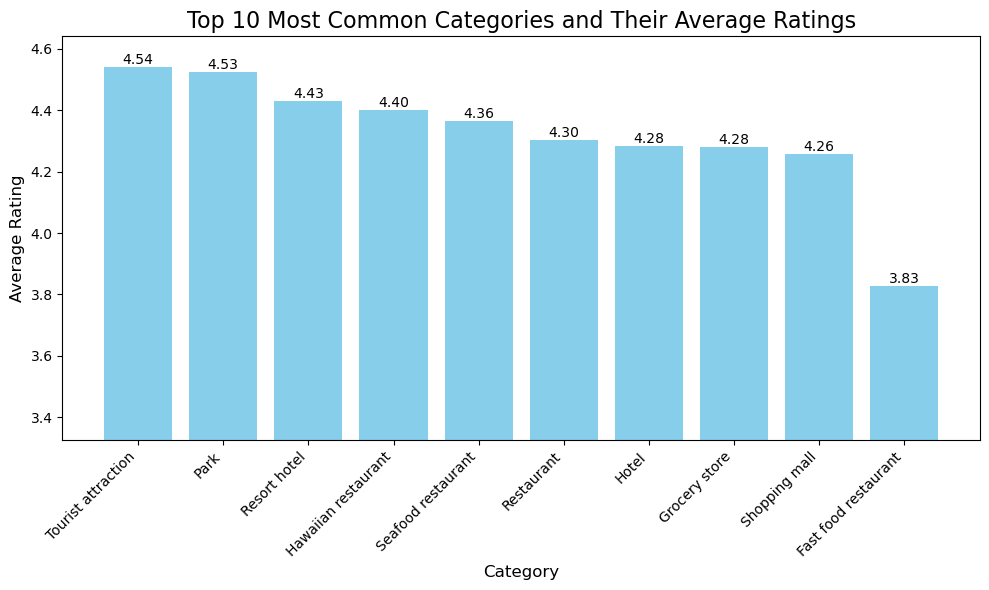

In [19]:
# Count the top 10 most common categories
top_10_common_categories = df['category'].value_counts().head(10)
average_ratings_top_categories = df[df['category'].isin(top_10_common_categories.index)].groupby('category')['rating'].mean()

# Sort the data for better visualization
average_ratings_top_categories = average_ratings_top_categories.loc[top_10_common_categories.index].sort_values(ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(average_ratings_top_categories.index, average_ratings_top_categories, color='skyblue')

# Truncate y-axis to focus on differences
plt.ylim(average_ratings_top_categories.min() - 0.5, average_ratings_top_categories.max() + 0.1)

# Add exact rating values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Top 10 Most Common Categories and Their Average Ratings', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

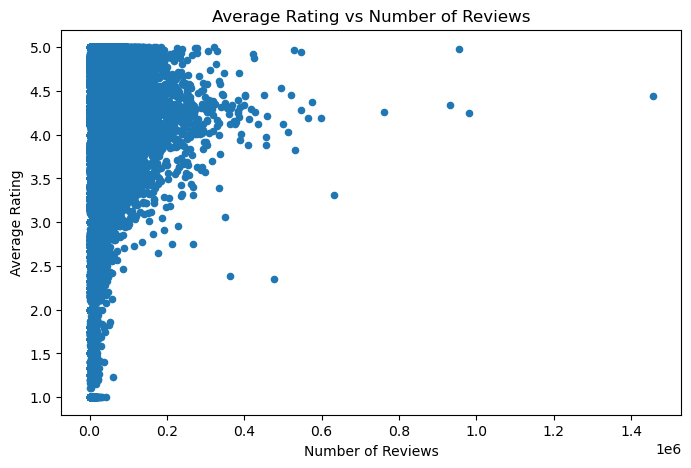

In [20]:
# Check for any relationships between average ratings and number of reviews
rating_vs_reviews = df.groupby('name_x').agg({'rating': 'mean', 'num_of_reviews': 'sum'})
rating_vs_reviews.plot.scatter(x='num_of_reviews', y='rating', figsize=(8, 5))
plt.title('Average Rating vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.show()

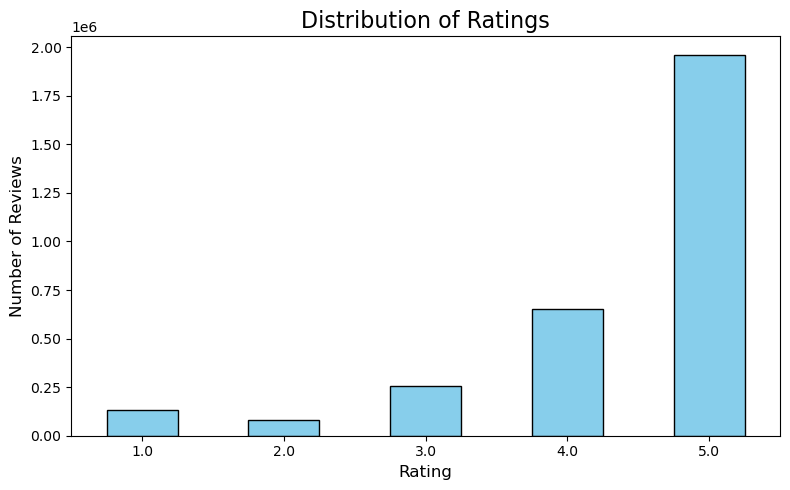

In [ ]:
# Count the occurrences of each rating
rating_counts = df['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

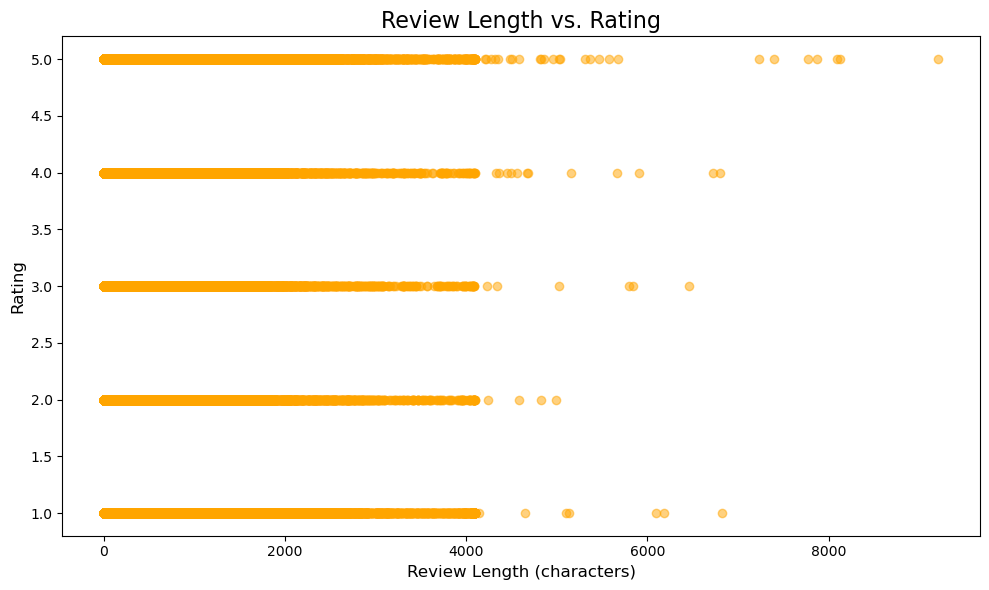

In [ ]:
# Review length vs. rating
plt.figure(figsize=(10, 6))
plt.scatter(df['review_length'], df['rating'], alpha=0.5, color='orange')
plt.title('Review Length vs. Rating', fontsize=16)
plt.xlabel('Review Length (characters)', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.tight_layout()
plt.show()

In [23]:
# Businesses with high ratings but few reviews
high_rating_low_reviews = df[(df['rating'] >= 4.5) & (df['num_of_reviews'] < 10)]
print("Businesses with High Ratings but Few Reviews:\n", high_rating_low_reviews[['name_x', 'rating', 'num_of_reviews']])

Businesses with High Ratings but Few Reviews:
                   name_x  rating  num_of_reviews
36          Karina Asher     5.0               6
37         Zach Childers     5.0               6
38             Don Locke     5.0               6
39            Diane Hart     5.0               6
40               Jason L     5.0               6
...                  ...     ...             ...
2997203     Emily Grieff     5.0               7
2997204   Camille Cotter     5.0               7
2997205    Daniel Girtin     5.0               7
2997207    Dustin Hoover     5.0               7
2997208  Becky Miligoulo     5.0               7

[23789 rows x 3 columns]


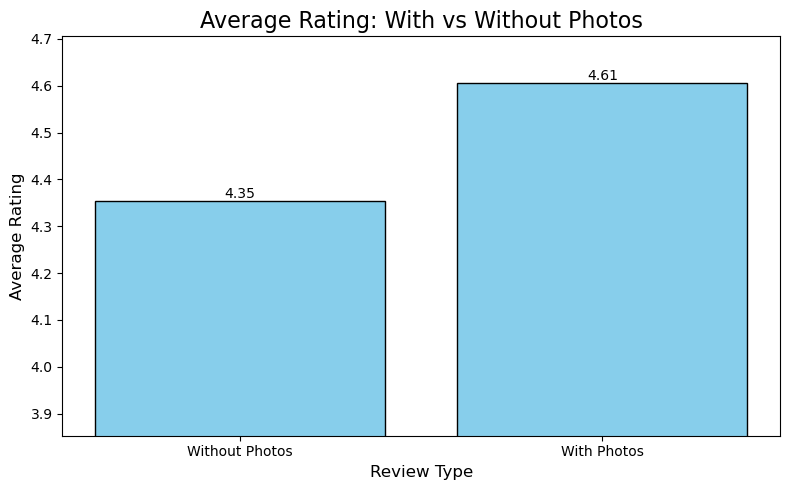

In [26]:
photo_ratings = df.groupby('has_photos')['rating'].mean()

# Plotting the bar graph
plt.figure(figsize=(8, 5))
bars = plt.bar(photo_ratings.index.map({False: 'Without Photos', True: 'With Photos'}),
               photo_ratings, color='skyblue', edgecolor='black')

# Truncate y-axis to focus on differences
plt.ylim(photo_ratings.min() - 0.5, photo_ratings.max() + 0.1)

# Add exact rating values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Add titles and labels
plt.title('Average Rating: With vs Without Photos', fontsize=16)
plt.xlabel('Review Type', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.tight_layout()
plt.show()


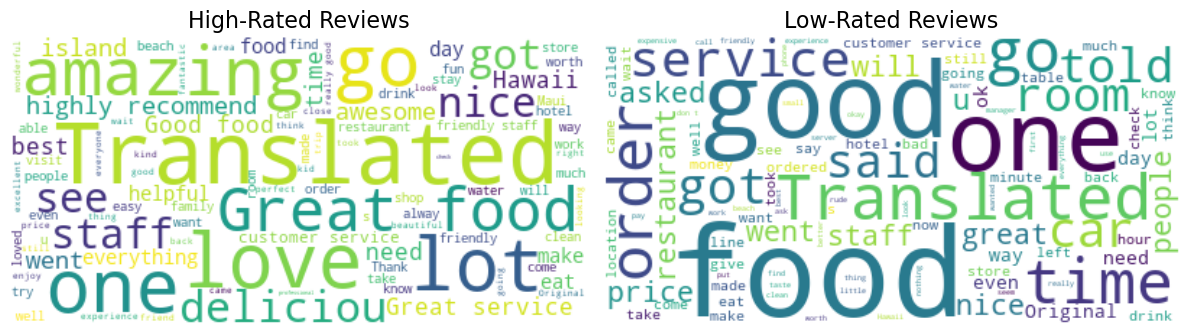

In [24]:
from wordcloud import WordCloud, STOPWORDS

# Create a set of stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['Google', 'place'])  # Add custom stopwords

# Filter high-rated reviews
high_rated_reviews = " ".join(df[df['rating'] >= 3.5]['text'].dropna())

# Filter low-rated reviews
low_rated_reviews = " ".join(df[df['rating'] <= 3.5]['text'].dropna())

# Generate word clouds with filtered words
high_rated_wc = WordCloud(stopwords=custom_stopwords, background_color='white', max_words=100).generate(high_rated_reviews)
low_rated_wc = WordCloud(stopwords=custom_stopwords, background_color='white', max_words=100).generate(low_rated_reviews)

# Plot word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(high_rated_wc, interpolation='bilinear')
plt.title('High-Rated Reviews', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(low_rated_wc, interpolation='bilinear')
plt.title('Low-Rated Reviews', fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


# Baseline Model